In [9]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import csv
import function as func

outdir='./output/test/yfactor'
rebinmethod = 0 # consider bin edges
doRebin = False # Rebinning in dat_to_array
rbw = 2e+6 # rbw in the measurements
rebin_rbw = 100e+6 # rbw after rebinning
if not doRebin: rebin_rbw = rbw
binary = False

#  A
'''
suffix='A'
path_300K = f"/data/ms2840a/2023-03-05/data/300K_SWEEP_setupA2"
path_77K = f"/data/ms2840a/2023-03-05/data/77K_SWEEP_setupA"
temp_300K_deg = 15.1 # deg
#'''

#  B
'''
suffix='B'
path_300K = f"/data/ms2840a/2023-03-05/data/300K_SWEEP_setupB2"
path_77K = f"/data/ms2840a/2023-03-05/data/77K_SWEEP_setupB"
temp_300K_deg = 15.2 # deg
#'''

#  C
'''
suffix='C'
path_300K = f"/data/ms2840a/2023-03-05/data/300K_SWEEP_setupC"
path_77K = f"/data/ms2840a/2023-03-05/data/77K_SWEEP_setupC"
temp_300K_deg = (15.3 + 14.8)/2. # deg
#'''

#  D
#'''
suffix='D'
path_300K = f"/data/ms2840a/2023-03-05/data/300K_SWEEP_setupD"
path_77K = f"/data/ms2840a/2023-03-05/data/77K_SWEEP_setupD"
temp_300K_deg = (14.5 + 13.9)/2. # deg
#'''

In [10]:
temp_300K = temp_300K_deg + 273.15 # deg --> K

if not os.path.isdir(outdir):
    os.makedirs(outdir)
    pass

In [11]:
# 300K
path = f'{path_300K}.dat'
freq, W_300K, W_300K_err = func.dat_to_array(path, doRebin=doRebin, rebinmethod=rebinmethod, rbw=rbw, binwidth=rebin_rbw, binary=binary)
               
# 77 K
path = f'{path_77K}.dat'
freq, W_77K, W_77K_err = func.dat_to_array(path, doRebin=doRebin, rebinmethod=rebinmethod, rbw=rbw, binwidth=rebin_rbw, binary=binary)
            
Gain, Trx, Gain_err, Trx_err \
= func.yfactor_analysis(freq, W_300K, W_77K, W_300K_err, W_77K_err, temp_300K, rbw=rebin_rbw)
y={}
y['freq'] = freq
y['W_300K'] = W_300K
y['W_300K_err'] = W_300K_err
y['W_77K'] = W_77K
y['W_77K_err'] = W_77K_err
y['Gain'] = Gain
y['Gain_err'] = Gain_err
y['Trx'] = Trx
y['Trx_err'] = Trx_err

np.save(f'{outdir}/gain_Trx{suffix}', y)

/data/analysis/adachi/dosue-analysis/DOSUE-J/Y-factor/function.py:214: RuntimeWarning: divide by zero encountered in true_divide
  Trx = b/a
/data/analysis/adachi/dosue-analysis/DOSUE-J/Y-factor/function.py:216: RuntimeWarning: invalid value encountered in true_divide
  Trx_err = np.sqrt( np.power(b_err/a, 2.) + np.power(a_err*b/(a*a), 2.) )


## Plot combined y-factor result

/data/analysis/adachi/dosue-analysis/DOSUE-J/Y-factor/function.py:407: RuntimeWarning: divide by zero encountered in log10
  dB = np.log10(ratio)*10.
/data/analysis/adachi/dosue-analysis/DOSUE-J/Y-factor/function.py:407: RuntimeWarning: invalid value encountered in log10
  dB = np.log10(ratio)*10.
/data/analysis/adachi/dosue-analysis/DOSUE-J/Y-factor/function.py:411: RuntimeWarning: divide by zero encountered in log10
  dB_up = np.log10(ratio+ratio_err)*10.
/data/analysis/adachi/dosue-analysis/DOSUE-J/Y-factor/function.py:411: RuntimeWarning: invalid value encountered in log10
  dB_up = np.log10(ratio+ratio_err)*10.
/data/analysis/adachi/dosue-analysis/DOSUE-J/Y-factor/function.py:412: RuntimeWarning: divide by zero encountered in log10
  dB_down = np.log10(ratio-ratio_err)*10.
/data/analysis/adachi/dosue-analysis/DOSUE-J/Y-factor/function.py:412: RuntimeWarning: invalid value encountered in log10
  dB_down = np.log10(ratio-ratio_err)*10.
/data/analysis/adachi/dosue-analysis/DOSUE-J/Y-

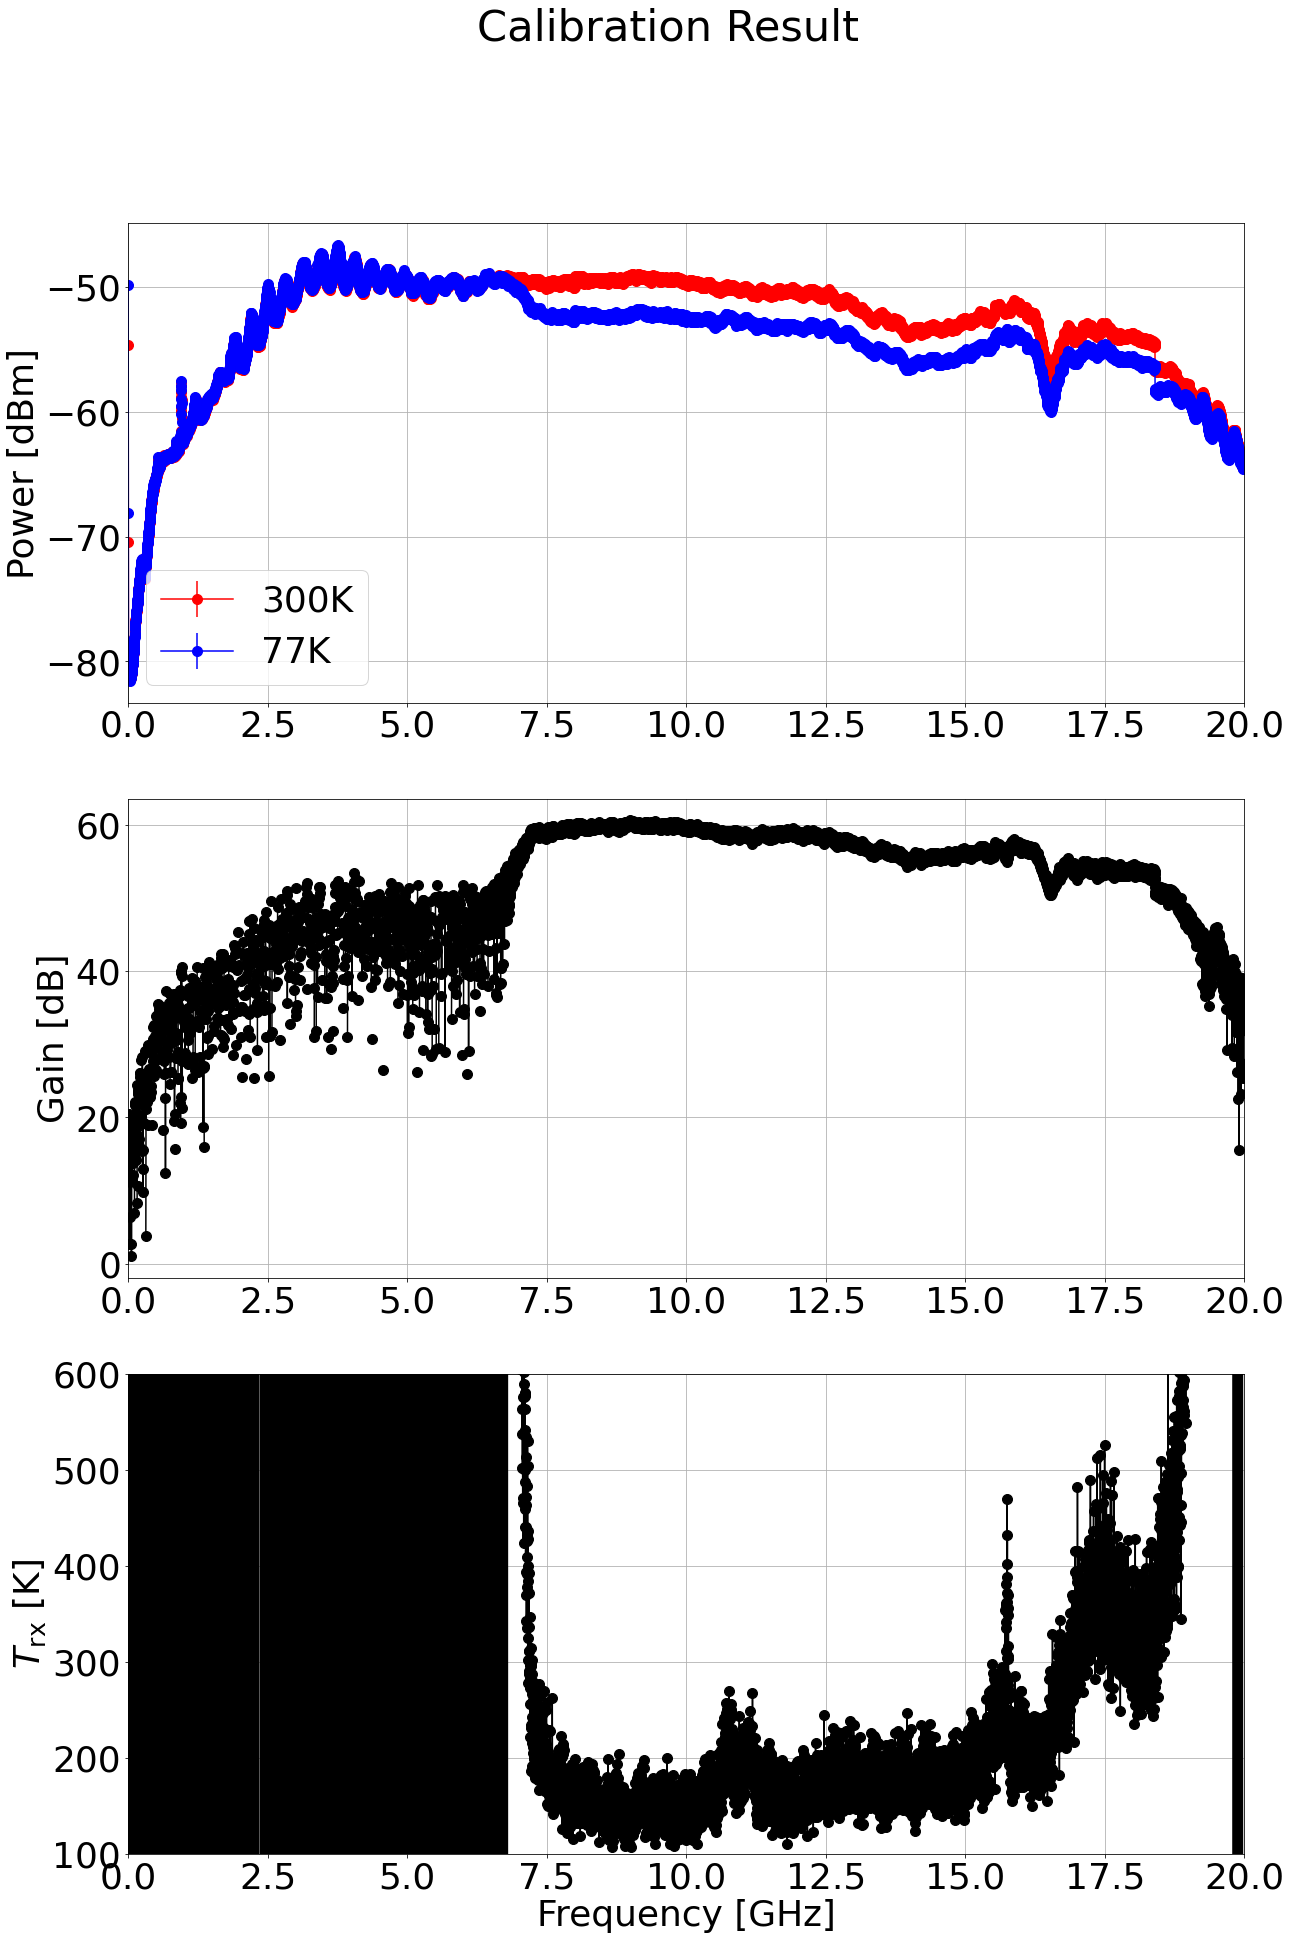

In [15]:
xmin = 0.0
xmax = 20.0
#xmin = 15.0
#xmax = 16.0

plt.rcParams["font.size"] = 36
plt.rcParams["lines.marker"] = 'o'
plt.rcParams["lines.markersize"] = 10.0

fig, axes = plt.subplots(3,1,figsize=(20,30), squeeze=False, sharex=False)
plt.suptitle("Calibration Result")

ax = axes[0][0]
W_300K_dBm, W_300K_dBm_err = func.W_to_dBm(y["W_300K"], y["W_300K_err"])
W_77K_dBm, W_77K_dBm_err = func.W_to_dBm(y["W_77K"], y["W_77K_err"])
ax.errorbar(y["freq"]*1e-9, W_300K_dBm, yerr=W_300K_dBm_err, color="red", label="300K")
ax.errorbar(y["freq"]*1e-9, W_77K_dBm, yerr=W_77K_dBm_err, color="blue", label="77K")
ax.set_ylabel("Power [dBm]")
ax.legend()
ax.grid()
ax.set_xlim([xmin, xmax])
#ax.set_ylim([-60, -50])

ax = axes[1][0]
gain_dB, gain_dB_err = func.ratio_to_dB(y["Gain"], y["Gain_err"])
ax.errorbar(y["freq"]*1e-9, gain_dB, yerr=gain_dB_err, color="black", label="Gain")
ax.set_ylabel("Gain [dB]")
ax.grid()
ax.set_xlim([xmin, xmax])
#ax.set_ylim([50, 60])

ax = axes[2][0]
ax.errorbar(y["freq"]*1e-9, y["Trx"], y["Trx_err"], color="black", label="Gain")
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel(r"$T_{\rm rx}$ [K]")
ax.grid()
ax.set_xlim([xmin, xmax])
ax.set_ylim([100, 600.])

plt.savefig(f"{outdir}/gain_Trx{suffix}.pdf")
#plt.savefig(f"{outdir}/gain_Trx{suffix}_15-16GHz.pdf")

# Compare y-factor results

In [6]:
input_files = [
    {'path':'./output/test/yfactor/gain_TrxA.npy', 'label':'A'},
    {'path':'./output/test/yfactor/gain_TrxB.npy', 'label':'B'},
    {'path':'./output/test/yfactor/gain_TrxC.npy', 'label':'C'},
    {'path':'./output/test/yfactor/gain_TrxD.npy', 'label':'D'},
]

In [7]:
data = []
for i in input_files:
    _data = np.load(i['path'], allow_pickle=True)
    _data = _data.item() # ndarray --> dict
    _data['label'] = i['label']
    data.append(_data)
    pass

FileNotFoundError: [Errno 2] No such file or directory: './output/test/yfactor/gain_TrxB.npy'

In [ ]:
xmin = 0.0
xmax = 20.0
#xmin = 15.0
#xmax = 16.0

plt.rcParams["font.size"] = 36
plt.rcParams["lines.marker"] = 'o'
plt.rcParams["lines.markersize"] = 10.0

fig, axes = plt.subplots(3,1,figsize=(20,30), squeeze=False, sharex=False)
plt.suptitle("Calibration Result")

for i, y in enumerate(data[::-1]):
    _label = y['label']
    ax = axes[0][0]
    W_300K_dBm, W_300K_dBm_err = func.W_to_dBm(y["W_300K"], y["W_300K_err"])
    W_77K_dBm, W_77K_dBm_err = func.W_to_dBm(y["W_77K"], y["W_77K_err"])
    ax.errorbar(y["freq"]*1e-9, W_300K_dBm, yerr=W_300K_dBm_err, label=f"{_label}: 300K", ls='-')
    ax.errorbar(y["freq"]*1e-9, W_77K_dBm, yerr=W_77K_dBm_err, label=f"{_label}: 77K", ls=':', marker='x')
    ax.set_ylabel("Power [dBm]")
    ax.legend(frameon=False)
    ax.set_xlim([xmin, xmax])
    ax.grid(True)

    ax = axes[1][0]
    gain_dB, gain_dB_err = func.ratio_to_dB(y["Gain"], y["Gain_err"])
    ax.errorbar(y["freq"]*1e-9, gain_dB, yerr=gain_dB_err, label=f"{_label}: Gain")
    ax.set_ylabel("Gain [dB]")
    ax.legend(frameon=False)
    ax.set_xlim([xmin, xmax])
    ax.grid(True)

    ax = axes[2][0]
    ax.errorbar(y["freq"]*1e-9, y["Trx"], y["Trx_err"], label=f"{_label}: Trx")
    ax.set_xlabel("Frequency [GHz]")
    ax.set_ylabel(r"$T_{\rm rx}$ [K]")
    ax.legend(frameon=False)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([100, 600.])
    ax.grid(True)
    pass

fig.set_tight_layout(True)
fig.savefig(f"{outdir}/gain_Trx_compare.pdf")